<a href="https://colab.research.google.com/github/DanielSajvin/Compiler/blob/main/Yoga-Pose-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Import NN layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data
import numpy as np # for math and arrays
import pandas as pd
import seaborn as sns # for plotting

In [ ]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [ ]:
all_ds = pd.read_csv('Test5_YogaPoses_Nums_Completed.csv')
all_ds

,POSE,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
0,0,8.533379,2.493388,155.628118,167.744911,65.308848,69.156519,8.163497,10.022567
1,0,4.083005,7.058673,162.490382,164.203458,86.062801,92.487008,19.074113,15.664330
2,0,10.713288,5.973813,160.446161,165.091847,85.984780,88.687401,18.324295,14.579814
3,0,10.192227,4.999405,146.517574,168.168232,66.525332,79.147658,11.740945,14.509123
4,0,6.541231,14.255083,153.434766,177.832598,97.035200,77.687719,25.451624,19.056081
...,...,...,...,...,...,...,...,...,...
535,11,32.341280,34.697163,132.943775,133.399059,170.746287,165.237470,179.583760,179.296062
536,11,27.870505,26.599099,132.554728,133.879904,163.078430,169.962854,174.953182,179.924549
537,11,25.244714,24.815232,171.262694,171.958400,167.918958,166.584342,179.591163,177.714350
538,11,24.983732,18.345772,161.487519,179.777819,170.559495,168.409232,179.217187,177.440177


In [ ]:
print(f'Humber of rows/examples and columns in the dataset: {all_ds.shape}')

Humber of rows/examples and columns in the dataset: (540, 9)


In [ ]:
# Summary of information on the dataset
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSE                540 non-null    int64  
 1   LeftShoulderAngle   540 non-null    float64
 2   RightShoulderAngle  540 non-null    float64
 3   LeftElbowAngle      540 non-null    float64
 4   RightElbowAngle     540 non-null    float64
 5   LeftHipAngle        540 non-null    float64
 6   RightHipAngle       540 non-null    float64
 7   LeftKneeAngle       540 non-null    float64
 8   RightKneeAngle      540 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 38.1 KB


In [ ]:
# Shuffle the rows to make sure the data is not sorted
all_ds = all_ds.sample(frac=1)
all_ds

,POSE,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
355,7,37.824980,33.393758,65.102457,64.646648,40.413136,40.184325,38.073455,28.701807
297,6,174.160415,170.379673,157.936093,145.935024,179.690666,131.857502,171.877903,31.575804
469,10,101.903513,90.677708,174.903895,168.032885,96.604912,100.491798,104.465739,112.319579
124,2,173.796964,158.729761,173.958351,169.812792,124.430054,129.956169,78.170272,122.999617
496,11,12.313274,1.438697,93.883819,152.221913,175.268392,179.915150,167.358421,171.855254
...,...,...,...,...,...,...,...,...,...
362,8,120.375800,74.957091,159.337211,175.080278,162.467541,69.122461,166.685221,174.616740
421,9,134.570125,132.656552,165.359918,152.238646,81.545806,88.441196,175.392404,176.595565
514,11,26.377774,28.170869,131.896953,139.573222,172.266141,168.680691,177.474573,174.541755
15,0,8.275430,5.387564,164.141512,163.701767,85.751140,94.338699,13.526688,16.617826


## Spit Data into Train/test split

In [ ]:
# Split the data into 80% train and 20% test (later will divide the test to test and validate)
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.2)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(432, 9)
(108, 9)


In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(valid_dataset.shape)

(54, 9)
(54, 9)


In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset     : {train_dataset.shape}")
print(f" Test  dataset     : {test_dataset.shape}")
print(f" Valid dataset     : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset     : (432, 9)
 Test  dataset     : (54, 9)
 Valid dataset     : (54, 9)


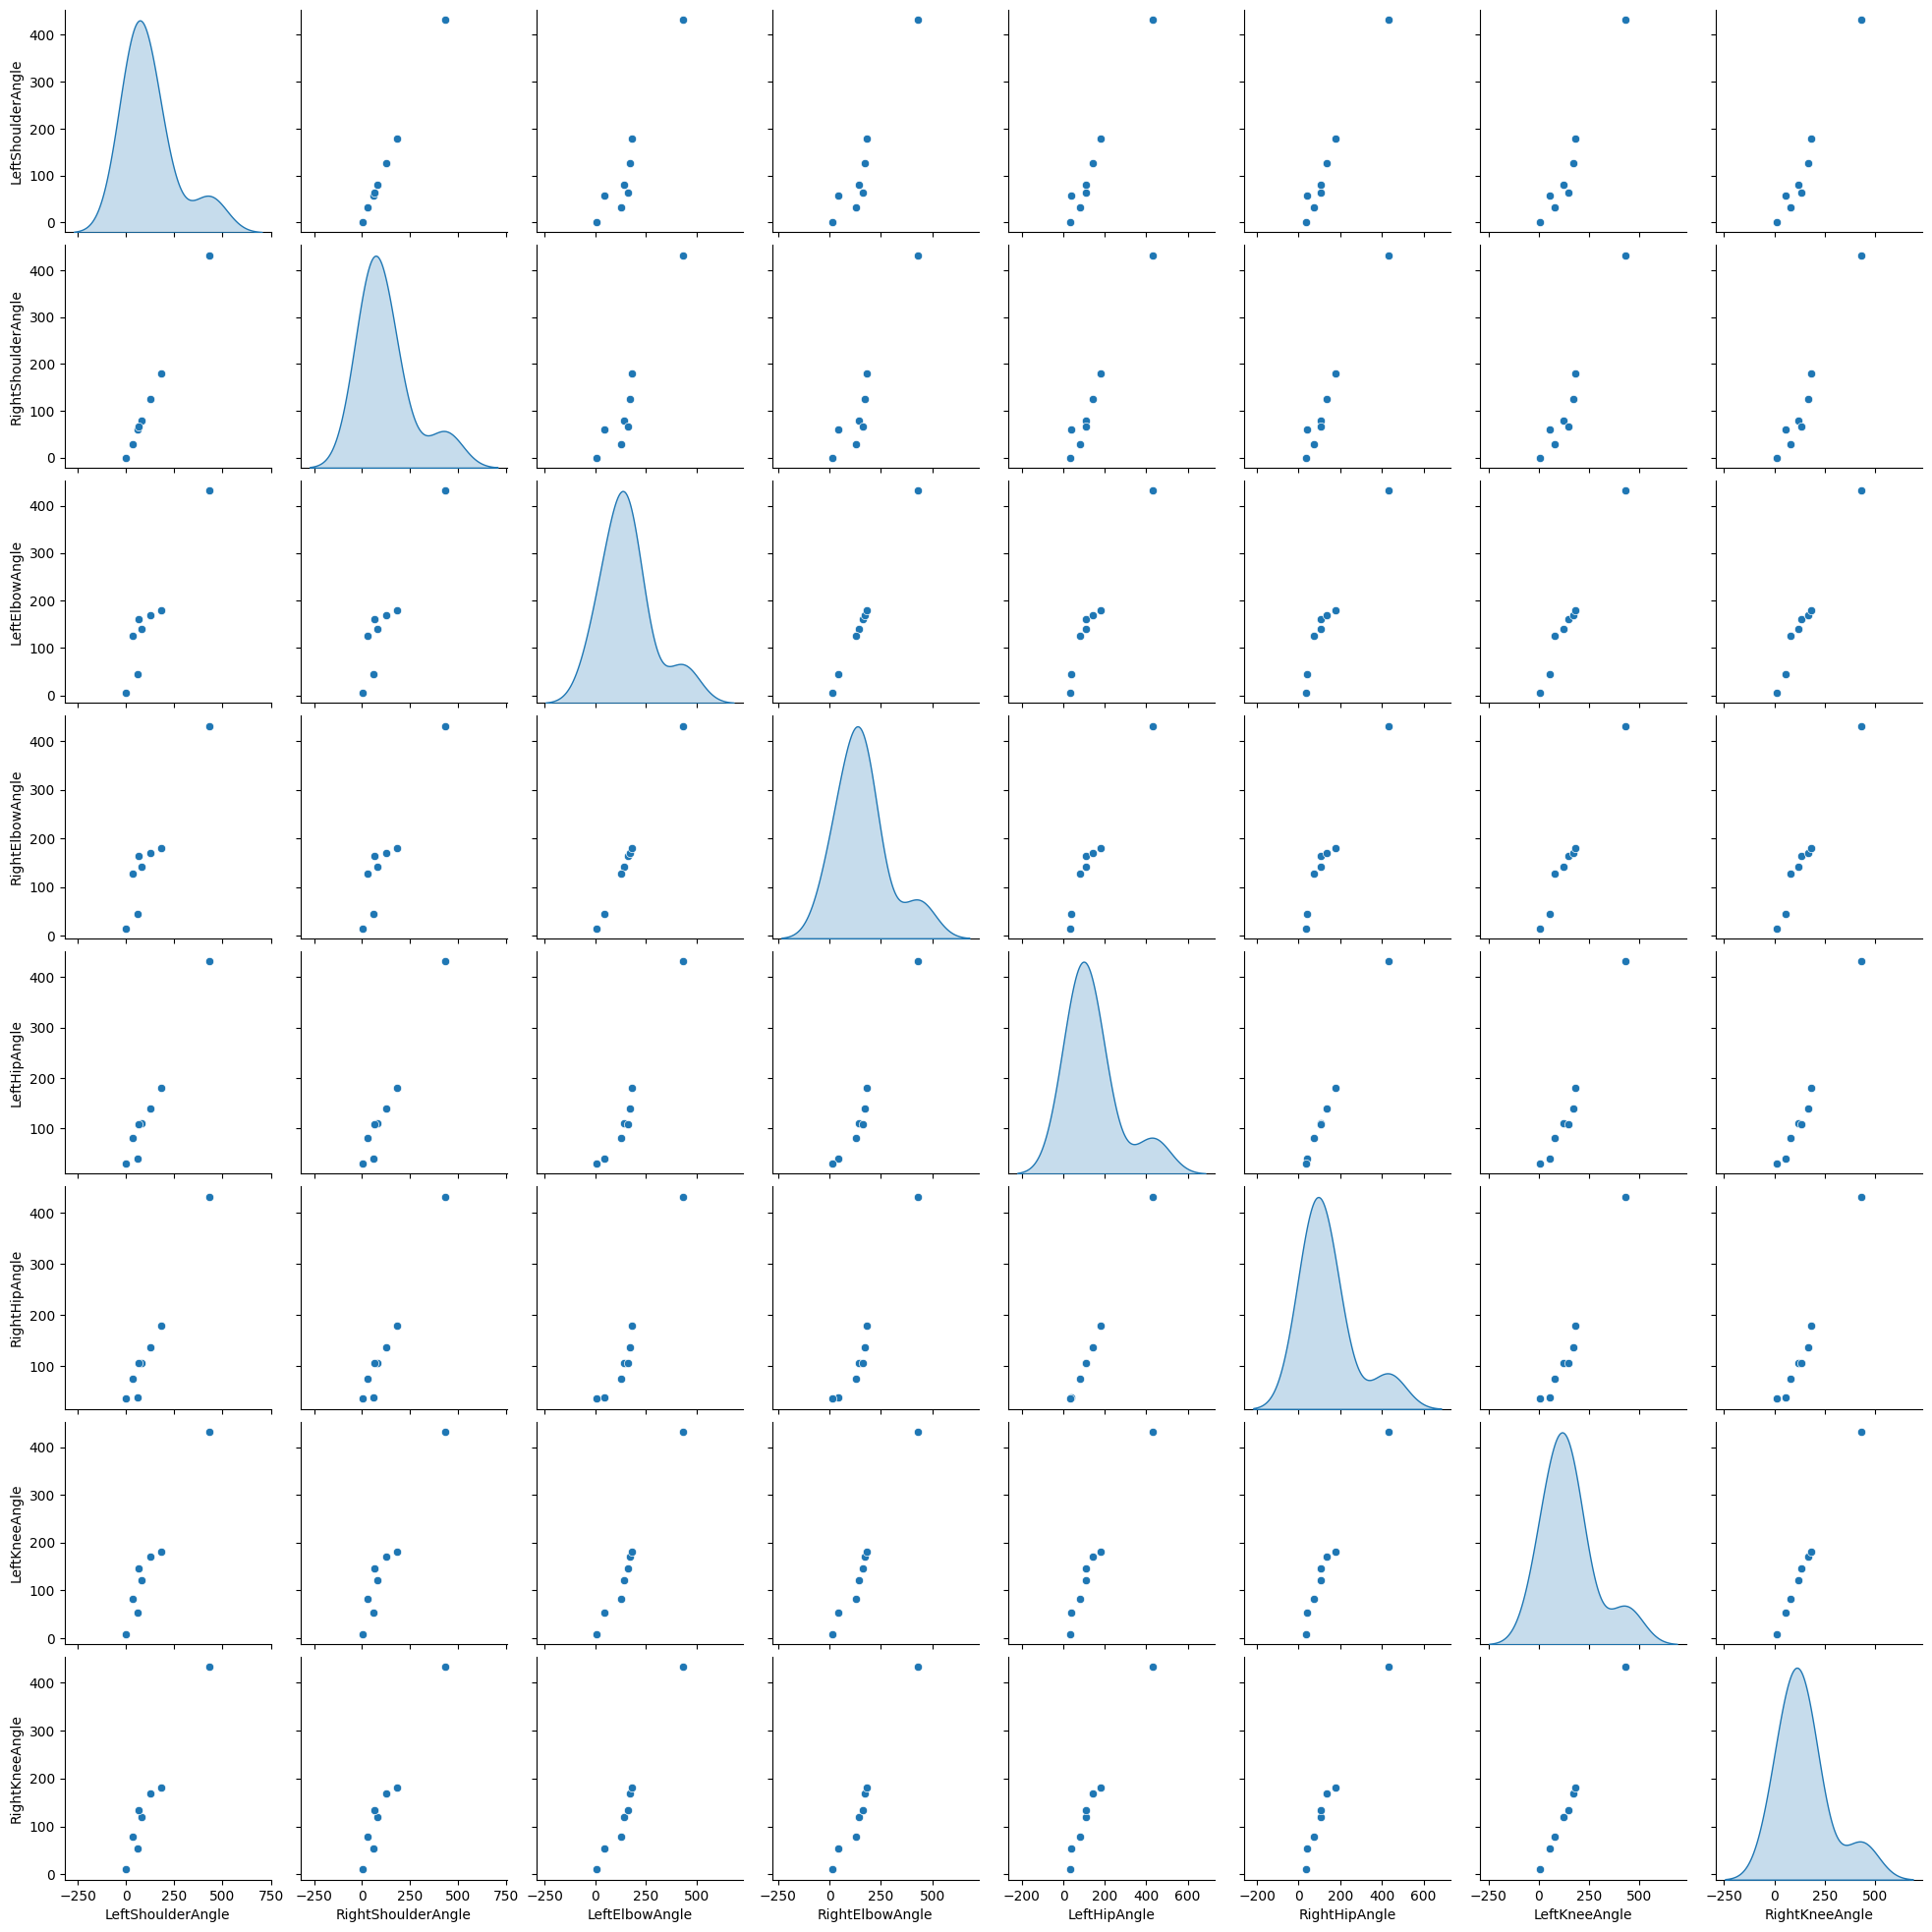

In [ ]:
# Plot the relationship between each two variables to spot anything incorrect

train_stats = train_dataset.describe()
train_stats.pop("POSE")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [ ]:
# Statistics on the train dataset to make sureit is in a good shape. (You may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("POSE")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
LeftShoulderAngle,432.0,79.508343,57.926844,0.506935,32.130764,64.077099,127.063963,179.887471
RightShoulderAngle,432.0,78.029033,59.150277,0.107248,28.026479,66.008553,125.097316,179.975379
LeftElbowAngle,432.0,139.726210,45.024312,5.472170,126.101203,160.503428,169.103921,179.984053
RightElbowAngle,432.0,141.708718,44.100053,15.581970,126.909037,163.962279,170.912722,179.917401
LeftHipAngle,432.0,110.456950,39.748036,30.772420,81.163188,109.020855,139.602114,179.954858
RightHipAngle,432.0,106.630859,39.456159,35.674085,75.875036,104.944358,136.701938,179.915150
LeftKneeAngle,432.0,122.226853,54.309288,8.163497,81.318530,145.825743,170.794234,179.989053
RightKneeAngle,432.0,119.531141,54.373509,10.022567,79.059266,134.234234,169.286205,179.992847


In [ ]:
train_labels1 = train_dataset.pop("POSE")
test_labels1 = test_dataset.pop("POSE")
valid_labels1 = valid_dataset.pop("POSE")

In [ ]:
train_labels = pd.get_dummies(train_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11
374,False,False,False,False,False,False,False,False,True,False,False,False
258,False,False,False,False,False,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False,False
404,False,False,False,False,False,False,False,False,True,False,False,False
440,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
325,False,False,False,False,False,False,False,True,False,False,False,False
25,True,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,True
45,False,True,False,False,False,False,False,False,False,False,False,False


# Data Normalization/Scaling

## Substract the mean of the training data and divide by the standar deviation of the training data.

In [ ]:
# Define a function to normalize the data set
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [ ]:
# Show a sample of the data after normalization
normed_test_data.head(10)

,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
417,1.531561,1.642910,0.481183,0.859723,-0.495709,-0.787168,0.735809,0.952751
340,-0.739361,-0.741280,-2.107995,-2.022989,-1.996990,-1.396482,-1.650796,-1.179134
416,1.430800,1.536375,0.426171,0.538292,-1.168638,-1.143187,0.996864,1.097385
174,-1.168213,-1.131612,0.325605,0.353651,0.683015,0.800979,0.733309,0.508204
65,-0.089992,-0.066311,0.785745,0.736969,0.369684,0.350635,-0.348248,-0.418705
447,1.416547,1.523892,0.507940,0.814251,-0.744047,-0.737905,0.741922,0.692208
338,-0.597707,-0.824158,-1.671962,-1.567668,-1.787742,-1.568174,-1.620975,-1.482519
133,1.238477,1.049620,0.242882,0.159106,-0.465287,-0.606676,-0.663729,-0.814788
285,1.660900,1.575330,0.364797,0.160199,1.678193,0.672168,0.963421,-1.482915
472,-0.007685,0.102003,-0.953394,-1.181845,-0.081129,-0.258959,-0.193012,-0.375132


# Build a Neural Network Model

In [ ]:
def build_model_two_hidden_layers():
  model = Sequential()
  model.add(Dense(16, input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(14, input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(12, activation='softmax')) # 12 neuronas en la capa de salida
  learning_rate = 0.00025
  optimizer = optimizers.Adam(learning_rate)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

EPOCHS = 250
batch_size = 2

model = build_model_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

# with tf.device('/CPU:0'):
with tf.device('/GPU:0'):
  history = model.fit(
      normed_train_data,
      train_labels,
      batch_size = batch_size,
      epochs = EPOCHS,
      verbose = 1,
      shuffle = True,
      steps_per_epoch = int(normed_train_data.shape[0] / batch_size),
      validation_data = (normed_valid_dataset, valid_labels)
  )

Here is a summary of this model: 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │             238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             180 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 562 (2.20 KB)

 Trainable params: 562 (2.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0956 - loss: 2.5162 - val_accuracy: 0.2407 - val_loss: 2.2856
Epoch 2/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3288 - loss: 2.0865 - val_accuracy: 0.2963 - val_loss: 2.0032
Epoch 3/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4986 - loss: 1.7892 - val_accuracy: 0.3519 - val_loss: 1.7735
Epoch 4/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6158 - loss: 1.5607 - val_accuracy: 0.5185 - val_loss: 1.5781
Epoch 5/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6904 - loss: 1.3757 - val_accuracy: 0.5370 - val_loss: 1.4131
Epoch 6/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7191 - loss: 1.2245 - val_accuracy: 0.5926 - val_loss: 1.2777
Epoch 7/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7072 - loss: 1.1012 - val_accuracy: 0.6111 - val_loss: 1.1689
Epoch 8/250
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7239 - loss: 1.0005 - val_accu

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,accuracy,loss,val_accuracy,val_loss,epoch
245,0.962963,0.112137,0.907407,0.642245,245
246,0.962963,0.111923,0.907407,0.643108,246
247,0.962963,0.111711,0.907407,0.643968,247
248,0.962963,0.111500,0.907407,0.644827,248
249,0.962963,0.111291,0.907407,0.645684,249


In [ ]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted values: 


array([[0.00000000e+00, 7.15383048e-25, 9.83813243e-06, 7.43078881e-15,
        1.01877358e-05, 9.11558260e-08, 1.59154997e-22, 1.85492318e-19,
        1.42509452e-04, 9.99830008e-01, 7.39216784e-06, 2.69323384e-24],
       [2.63463349e-08, 1.78966300e-08, 5.22349765e-05, 2.27061224e-26,
        1.99132906e-16, 2.54948180e-19, 5.05401871e-08, 9.99052584e-01,
        5.79310136e-27, 9.41704020e-16, 8.95116711e-04, 0.00000000e+00],
       [0.00000000e+00, 9.63945746e-32, 1.22164634e-08, 2.52605325e-17,
        9.12074949e-09, 8.22729726e-06, 8.31652661e-30, 8.45309504e-24,
        1.01785241e-04, 9.99889910e-01, 5.66907010e-09, 8.04458399e-31],
       [1.73110213e-12, 1.09696540e-11, 7.16338162e-18, 9.87736344e-01,
        2.31450883e-07, 4.52269461e-07, 3.89480770e-20, 3.96742964e-21,
        2.34291765e-05, 1.46300669e-16, 5.39110372e-16, 1.22395037e-02],
       [1.82779564e-04, 9.99802113e-01, 1.52684308e-07, 1.05832765e-09,
        1.44913483e-05, 2.44631120e-15, 9.15077720e-08, 5.74

## See how the training went

In [ ]:
from matplotlib import pyplot as plt

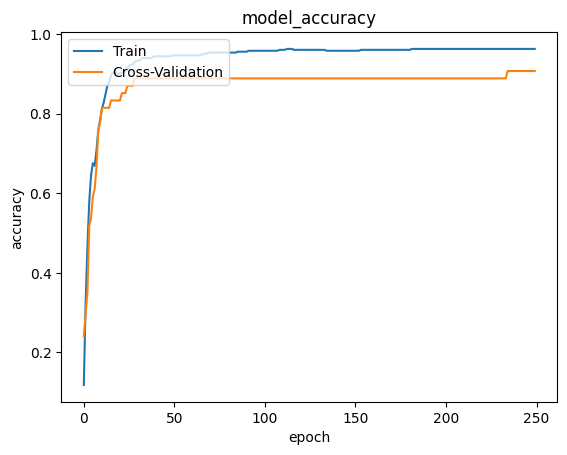

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

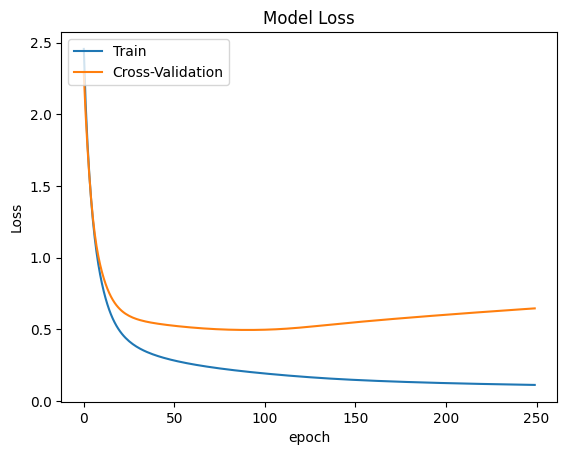

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)
print('Accuracy: {:5.2f}'.format(accuracy))

Train Split: 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.1112  
Accuracy:  0.97


In [ ]:
print('Evaluation Split: ')
loss, accuracy = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)
print("Accuracy: {:5.2f}".format(accuracy))

Evaluation Split: 
2/2 - 0s - 22ms/step - accuracy: 0.9074 - loss: 0.6457
Accuracy:  0.91


In [ ]:
print('Test Split: ')
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Accuracy: {:5.2f}".format(accuracy))

Test Split: 
2/2 - 0s - 22ms/step - accuracy: 0.9444 - loss: 0.3158
Accuracy:  0.94


In [ ]:
from sklearn.metrics import confusion_matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Text(0.5, 1.0, 'Confusion Matrix')

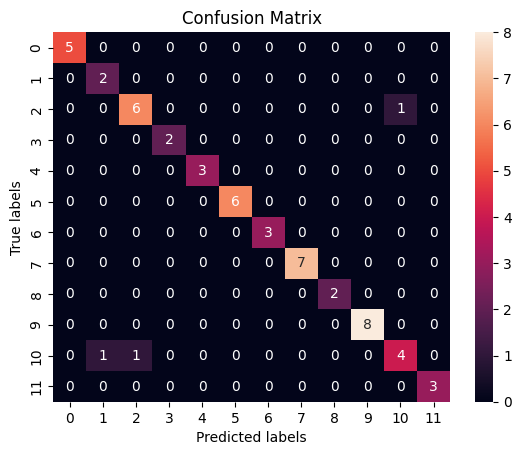

In [ ]:
ax = plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
def getMaxValueAndPosition(arr) :
  max = arr[0]
  pos = 0
  for i in range(0, len(arr)):
  #Compare elements of array with max
    if(arr[i] > max):
      max = arr[i]
      pos = i

  print("Largest element present in given array: ", str(max), " at position: ", str(pos));

In [ ]:
positionPredict = 17
predict = model.predict(normed_test_data)
predict = predict[positionPredict]
print("Predict value: ",predict)
getMaxValueAndPosition(predict)
result = test_labels1.iat[positionPredict]
print("Real value: ", result)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predict value:  [2.3036796e-18 5.6632709e-11 2.0155078e-07 1.1114316e-01 3.4595788e-01
 6.9051130e-05 1.2103872e-13 1.5552880e-14 5.4274893e-01 1.5150810e-05
 6.3123471e-06 5.9268172e-05]
Largest element present in given array:  0.5427489  at position:  8
Real value:  8


## Save Model

In [ ]:
keras_file = "ypc_m4.h5"
tf.keras.models.save_model(model, keras_file)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("ypc_m4.tflite", "wb").write(tfmodel)

Saved artifact at '/tmp/tmphmtu8_20'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  136672692493136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136672692494864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136672692496592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136672692495440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136672692495824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136672692496016: TensorSpec(shape=(), dtype=tf.resource, name=None)


4116